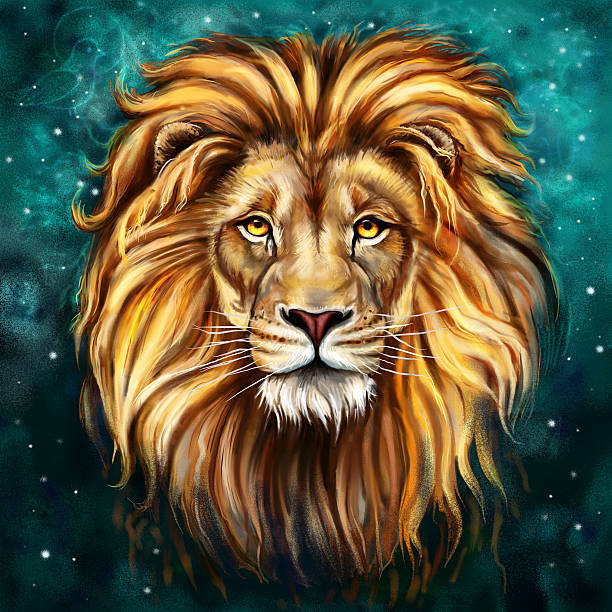

Image Size: 612x612, Channels: 3
Number of Pixels: 374544


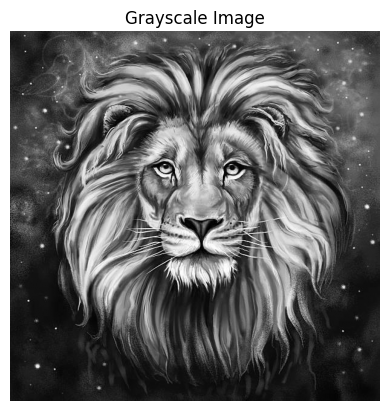

Area of Black Pixels: 283871


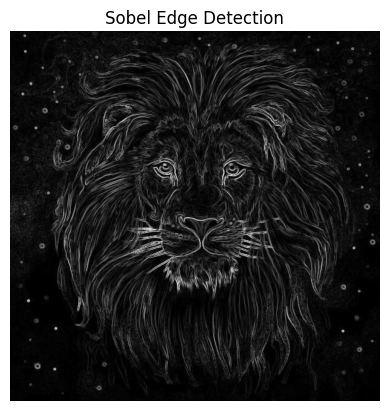

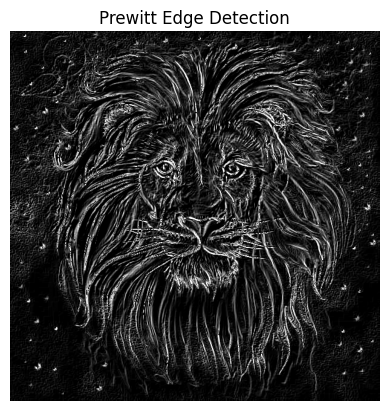

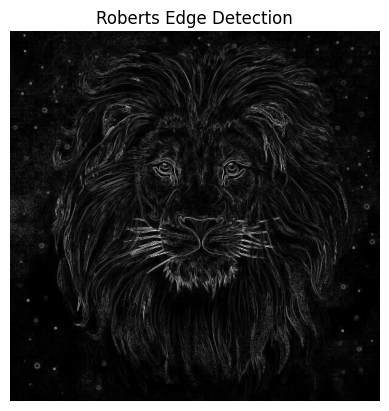

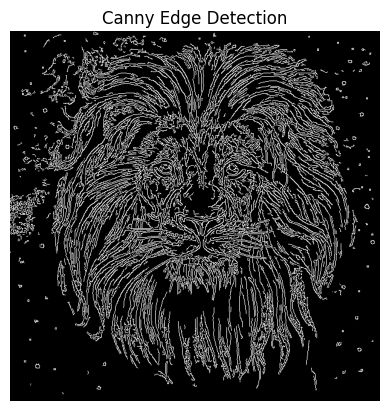

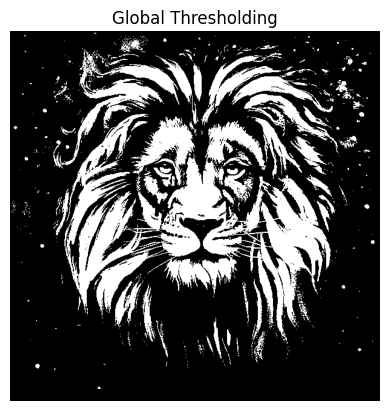

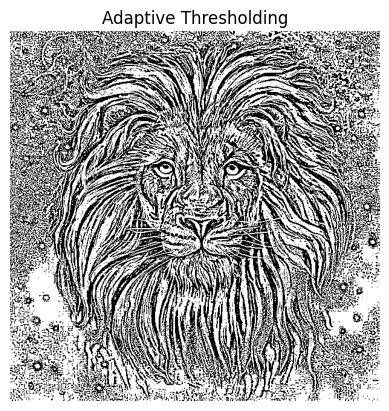

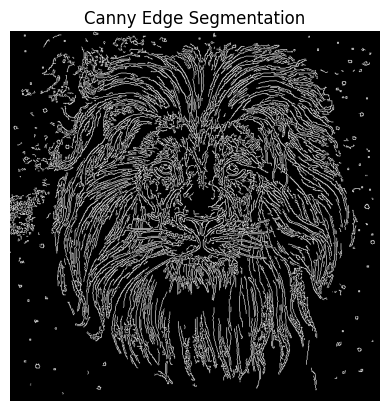

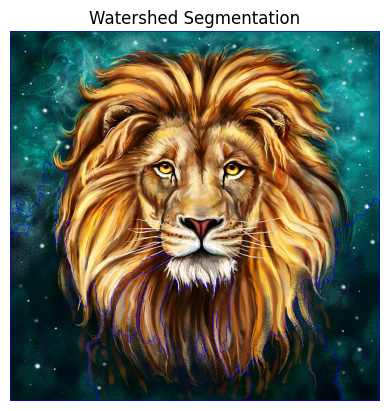

In [4]:
import cv2
import numpy as np
from skimage import filters
from skimage.segmentation import watershed
from scipy import ndimage
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


# Task 1: Understanding and Manipulating an Image
# 1. Read the image
image = cv2.imread('lion.jpg')

# 2. Display the image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()



# 3. Extraction of Image Size
height, width, channels = image.shape
print(f"Image Size: {height}x{width}, Channels: {channels}")

# 4. Calculation of Image Pixels
num_pixels = height * width
print(f"Number of Pixels: {num_pixels}")

# 5. Convert RGB to Grayscale Image
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray_image.jpg', gray_image)  # Save the grayscale image



# Display grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()



# 6. Convert RGB to Grayscale and Binary Image by using a threshold
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2.imwrite('binary_image.jpg', binary_image)

# Count the area of black pixels
black_pixels = np.sum(binary_image == 0)
print(f"Area of Black Pixels: {black_pixels}")


# Task 2: Manipulating the Properties of an Image
# 1. Perform Edge Detection
# i. Sobel Operator
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)
plt.imshow(sobel_edge, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()



# ii. Prewitt Operator
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x = cv2.filter2D(gray_image, -1, kernelx)
prewitt_y = cv2.filter2D(gray_image, -1, kernely)
prewitt_edge = prewitt_x + prewitt_y
plt.imshow(prewitt_edge, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')
plt.show()



# iii. Roberts Cross Operator
roberts_x = filters.roberts_pos_diag(gray_image)
roberts_y = filters.roberts_neg_diag(gray_image)
roberts_edge = np.sqrt(roberts_x**2 + roberts_y**2)
plt.imshow(roberts_edge, cmap='gray')
plt.title('Roberts Edge Detection')
plt.axis('off')
plt.show()



# iv. Canny Edge Detector
canny_edge = cv2.Canny(gray_image, 100, 200)
plt.imshow(canny_edge, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()



# 2. Perform Image Segmentation
# i. Global Thresholding for Image Segmentation
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding')
plt.axis('off')
plt.show()



# ii. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')
plt.show()



# iii. Edge Detection for Segmentation (Canny Edge Detection)
plt.imshow(canny_edge, cmap='gray')
plt.title('Canny Edge Segmentation')
plt.axis('off')
plt.show()



# iv. Region-Based Segmentation (Watershed Algorithm)
# Convert image to grayscale and apply threshold
ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Watershed Segmentation')
plt.axis('off')
plt.show()



In [ ]:
|